## Задание
Загрузить текст в память и по какому-нибудь признаку посчитать частоты слов, входящих в текст. Построить гистограмму частот


Был выбран текст "Маленький Принц". Он не совсем большой, но и не такой маленький. Так как алгоритм работает за $O(n^2)$, то более
большие тексты(такие как Гарри Поттер) выполнялись совем уж неприличное время

In [2]:
import matplotlib
import numpy as np
import pandas as pd
import Levenshtein as Lev
import re

pd.set_option('display.max_rows', 100)

tokens = None
with open('./little-prince', 'r') as f:
    text = f.read().strip()

Текст был разбит на токены - самостоятельные слова по следующему регулярному выражению. 

In [3]:
tokens = re.split(r'[\n\r\s\.,\'\"\(\):\!\?\+\d]+', text)

Функция дистанции была выбрана в пользу Левенштейна. Критерий похожести - количество изменения должно быть меньше чем $$\frac{\max(len(token_1), len(token_2))}{4}$$

In [4]:
def are_similar(w1, w2):
    max_length = max(len(w1), len(w2))
    
    if Lev.distance(w1, w2) < max_length // 3:
        return True
    return False

Далее, из получившихся токенов убрались все, у которых длина > 4. Сделано это для того что бы выбросить все ненужные токены
Такие как номера телефонов, различные цифры. В общем то, что плохо распарсилось реуляркой

In [5]:
tokens = list(filter(lambda x: len(x) > 4, tokens))

Алгоритм работает по принципу: пройтись два раза по всем токенам и найти похожие по расстоянию Левенштейна. Отрабатывает за квадратичное время от количества слов

In [6]:
import time
start = time.time()
frequency_map = dict(zip(tokens, np.ones(len(tokens), dtype='int')))

for i, token in enumerate(tokens):
    for j, f_word in enumerate(tokens):
        if are_similar(token, f_word) and (i is not j):
            frequency_map[f_word] += 1

end = time.time()
print(end - start)

23.444406270980835


In [7]:
print(frequency_map)
df = pd.DataFrame({
    "Frequency": list(frequency_map.values()),
}, index=list(frequency_map.keys()))

df.sort_values(by=['Frequency'], ascending=False, inplace=True)
df.head()


{'леону': 8, 'верту': 8, 'прошу': 9, 'детей': 3, 'простить': 3, 'посвятил': 1, 'книжку': 14, 'взрослому': 6, 'скажу': 6, 'оправдание': 1, 'взрослый': 80, 'самый': 16, 'лучший': 4, 'понимает': 44, 'свете': 64, 'детские': 1, 'книжки': 5, 'наконец': 81, 'живет': 25, 'франции': 12, 'сейчас': 16, 'голодно': 3, 'холодно': 6, 'очень': 5471, 'нуждается': 2, 'утешении': 1, 'оправдывает': 1, 'посвящу': 1, 'мальчику': 5, 'каким': 1, 'когда-то': 25, 'взрослые': 429, 'сначала': 12, 'детьми': 1, 'только': 1886, 'помнит': 1, 'исправляю': 2, 'посвящение': 1, 'когда': 2807, 'маленьким': 728, 'шесть': 80, 'книге': 3, 'названием': 1, 'правдивые': 1, 'истории': 4, 'рассказывалось': 6, 'девственные': 1, 'увидел': 184, 'однажды': 64, 'удивительную': 2, 'картинку': 11, 'картинке': 4, 'огромная': 4, 'глотала': 1, 'хищного': 1, 'зверя': 1, 'говорилось': 1, 'заглатывает': 3, 'жертву': 1, 'целиком': 1, 'после': 64, 'этого': 728, 'может': 440, 'шевельнуться': 6, 'полгода': 1, 'подряд': 4, 'переварит': 1, 'много':

,Frequency
маленький,27985
принц,27259
сказал,13674
очень,5471
когда,2807


In [ ]:
Hist от DataFrame не использовался, так как значения frequency уже являются частотами. Вместо этого использовался стандартный matplotlib.pyplot.bar график.
На гистограмме показано распределение первых 10 элементов. Изменяя переменную N можно посмотреть, как это будет выглядить при больших значенияъ

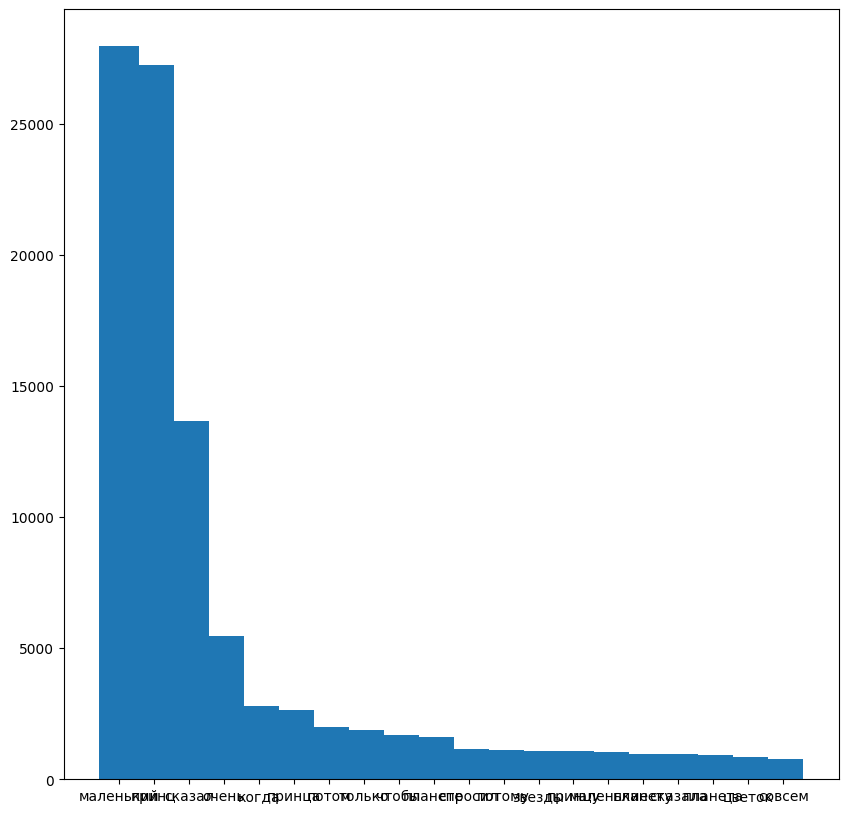

In [9]:
# https://pythonspot.com/matplotlib-bar-chart/
import matplotlib.pyplot as plt; plt.rcdefaults()
matplotlib.rcParams['figure.figsize'] = [10, 10]

N = 20
objects = list(df.index)[:N]
y_pos = df['Frequency'].values[:N]

plt.bar(objects, y_pos, width=(3+N)/N, align='center');